In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

c:\anaconda3\envs\std\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# 데이터셋 다운로드 및 DataLoader 생성
train_dataset = dsets.FashionMNIST(root='./data',
                                   train=True,
                                   transform=transforms.ToTensor(),
                                   download=True)

test_dataset = dsets.FashionMNIST(root='./data',
                                  train=False,
                                  transform=transforms.ToTensor())

batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [3]:
# setting device on GPU if available, else CPU

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


Epoch [1/30], Step [100/600], Loss: 2.2835, Train Acc: 0.1100
Epoch [1/30], Step [200/600], Loss: 2.2397, Train Acc: 0.1850
Epoch [1/30], Step [300/600], Loss: 2.2256, Train Acc: 0.2133
Epoch [1/30], Step [400/600], Loss: 2.1632, Train Acc: 0.2800
Epoch [1/30], Step [500/600], Loss: 2.1546, Train Acc: 0.3000
Epoch [1/30], Step [600/600], Loss: 2.0913, Train Acc: 0.3383
Epoch [2/30], Step [100/600], Loss: 2.0398, Train Acc: 0.4800
Epoch [2/30], Step [200/600], Loss: 2.0331, Train Acc: 0.5000
Epoch [2/30], Step [300/600], Loss: 1.9468, Train Acc: 0.5300
Epoch [2/30], Step [400/600], Loss: 1.9291, Train Acc: 0.5425
Epoch [2/30], Step [500/600], Loss: 1.8944, Train Acc: 0.5520
Epoch [2/30], Step [600/600], Loss: 1.8805, Train Acc: 0.5483
Epoch [3/30], Step [100/600], Loss: 1.7992, Train Acc: 0.5700
Epoch [3/30], Step [200/600], Loss: 1.7612, Train Acc: 0.5800
Epoch [3/30], Step [300/600], Loss: 1.7044, Train Acc: 0.6000
Epoch [3/30], Step [400/600], Loss: 1.6227, Train Acc: 0.6175
Epoch [3

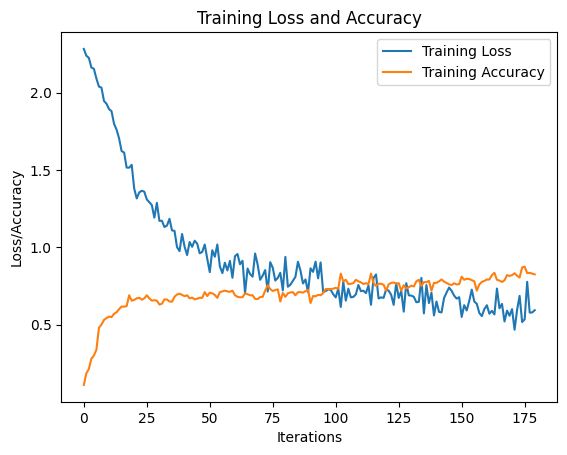

In [5]:
# 로지스틱 회귀 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 128)
        self.linear2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.linear(x)
        out = self.relu(out)
        out = self.linear2(out)

        return out

# 하이퍼파라미터 설정
input_size = 28 * 28
num_classes = 10
num_epochs = 30
learning_rate = 0.001

# 모델, 손실 함수, 옵티마이저 정의
model = LogisticRegression(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 모델 학습
total_step = len(train_loader)
loss_list = []
acc_list = list()
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        # 데이터 로드
        # -1 784
        # images.shape --> batch 28 28  --> batch 784
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # 순전파 및 손실 계산
        outputs = model(images)
        loss = criterion(outputs, labels) 

        # 역전파 및 가중치 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 로그 출력
        if (i+1) % 100 == 0:
            loss_list.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Train Acc: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))

# 손실 및 정확도 그래프 출력
plt.plot(loss_list, label='Training Loss')
plt.plot(acc_list, label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Loss/Accuracy')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.show()

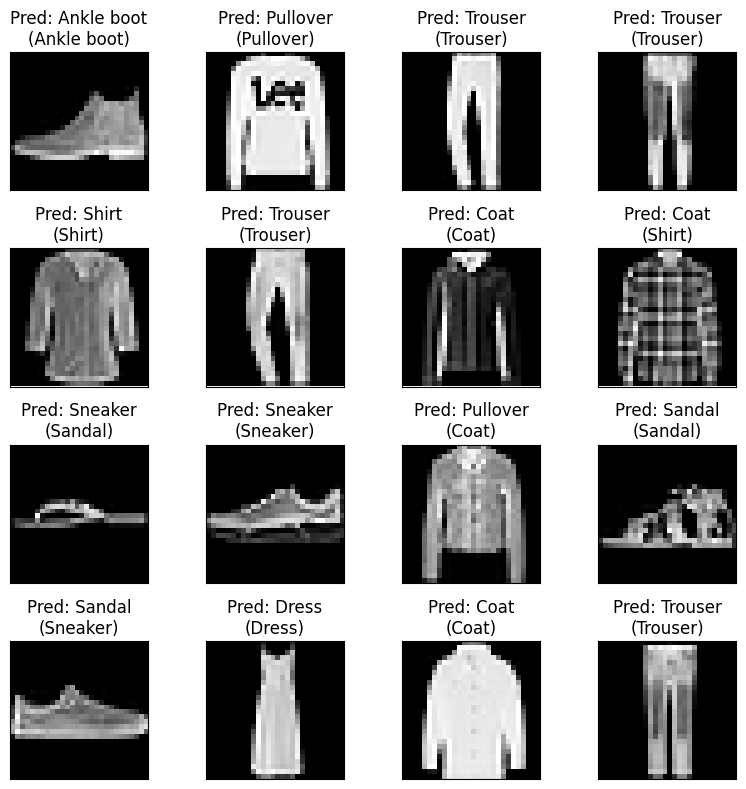

'\n라벨 정보\n0 T-shirt/top (티셔츠)\n1 Trouser (바지)\n2 Pullover (스웨터)\n3 Dress (드레스)\n4 Coat (코트)\n5 Sandal (샌들)\n6 Shirt (셔츠)\n7 Sneaker (운동화)\n8 Bag (가방)\n9 Ankle boot (앵클 부츠)\n'

In [10]:
import matplotlib.pyplot as plt
import numpy as np

model.eval()

classes = test_dataset.classes

# 테스트 이미지 가져오기
dataiter = iter(test_loader)
images, labels = dataiter.__next__()
images = images.to(device).reshape(-1, 28*28)

# 모델 예측
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)

# 이미지와 예측값 시각화
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(images[i].cpu().reshape(28, 28)), cmap='gray')
    ax.set_title(f"Pred: {classes[predicted[i].item()]}\n({classes[labels[i].item()]})")

plt.tight_layout()
plt.show()


"""
라벨 정보
0 T-shirt/top (티셔츠)
1 Trouser (바지)
2 Pullover (스웨터)
3 Dress (드레스)
4 Coat (코트)
5 Sandal (샌들)
6 Shirt (셔츠)
7 Sneaker (운동화)
8 Bag (가방)
9 Ankle boot (앵클 부츠)
"""

In [15]:
# 로지스틱 회귀 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 196)
        self.linear2 = nn.Linear(196, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.linear(x)
        out = self.relu(out)
        out = self.linear2(out)

        return out

# 하이퍼파라미터 설정
input_size = 28 * 28
num_classes = 10
num_epochs = 10
learning_rate = 0.001

# 모델, 손실 함수, 옵티마이저 정의
model = LogisticRegression(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 모델 학습
total_step = len(train_loader)

loss_list = []
acc_list = list()

test_loss_list = []
test_acc_list = []

for epoch in range(num_epochs):
    model.train()

    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        # 데이터 로드
        # -1 784
        # images.shape --> batch 28 28  --> batch 784
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # 순전파 및 손실 계산
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파 및 가중치 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 로그 출력
        if (i+1) % 600 == 0:
            loss_list.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Train Acc: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))

    # 테스트 코드가 여기에 진행 되어야함
    # model.eval() or with torch.no_grad() 둘 중에 하나 반드시 사용
    # model.eval() 사용하는 경우 다시 train 할때 model.train() 을 반드시 선언 해야됨
    model.eval()

    # total은 사실 전체 데이터셋 크기
    # total = len(test_dataset)
    total = 0
    correct = 0
    loss_sum = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss_sum += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

#         test_loss_list.append(loss.item())
#         test_acc_list.append((predicted == labels).sum().item() / labels.size(0))

    test_loss_list.append(loss_sum / (total/batch_size))
    test_acc_list.append(correct / total)

Epoch [1/10], Step [600/600], Loss: 1.9947, Train Acc: 0.6500
Epoch [2/10], Step [600/600], Loss: 1.6929, Train Acc: 0.6500
Epoch [3/10], Step [600/600], Loss: 1.4671, Train Acc: 0.6700
Epoch [4/10], Step [600/600], Loss: 1.2660, Train Acc: 0.6400
Epoch [5/10], Step [600/600], Loss: 1.1362, Train Acc: 0.7000
Epoch [6/10], Step [600/600], Loss: 1.0523, Train Acc: 0.6400
Epoch [7/10], Step [600/600], Loss: 0.9590, Train Acc: 0.7200
Epoch [8/10], Step [600/600], Loss: 0.8270, Train Acc: 0.7700
Epoch [9/10], Step [600/600], Loss: 0.9509, Train Acc: 0.6800
Epoch [10/10], Step [600/600], Loss: 0.8461, Train Acc: 0.7300


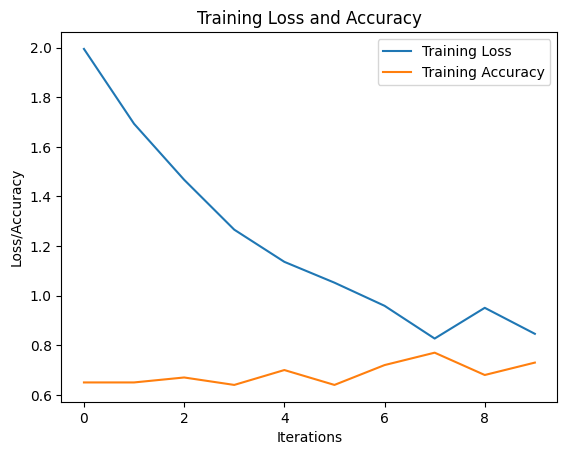

In [16]:
# 손실 및 정확도 그래프 출력
plt.plot(loss_list, label='Training Loss')
plt.plot(acc_list, label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Loss/Accuracy')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.show()